## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# read in dataset
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')

As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [4]:
# filter for only score columns
data = data.loc[:, data.columns.str.contains('score')].reset_index(drop=True)

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [5]:
# standardize features
sc = StandardScaler()
data_sc = sc.fit_transform(data)
data_sc = pd.DataFrame(data_sc, columns=data.columns)

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [13]:
# run kmeans for values of k between 2 and 30 and store changes in SSE
sse = []
silhouette = []
k_values = range(2, 31)

for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data_sc)
  sse.append(kmeans.inertia_)

  preds = kmeans.predict(data_sc)
  silhouette.append(silhouette_score(data_sc, preds, metric='euclidean'))

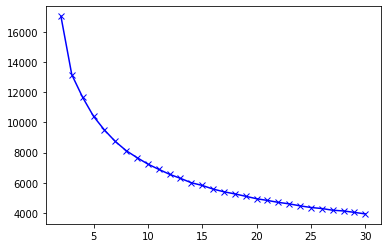

In [15]:
plt.plot(k_values, sse, 'bx-')
plt.show()

No clear elbow emerges from the plot. It's difficult to  make a call about best k-value from this plot. The largest drop in SSE was between k=2 and k=3, but it seems like the best value could be somewhere in the 3-7 range. 

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

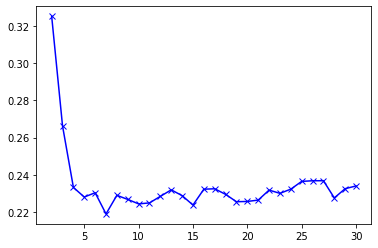

In [18]:
# answer goes here
plt.plot(k_values, silhouette, 'bx-')
plt.show()



The silhouette plot shows a best score at k=2. Selecting this value is not inconsistent with the SSE plot, which showed the most significant decrease in SSE between k=2 and k=3. 